In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [2]:
conv_base=tf.keras.applications.VGG16(
    include_top = False,
    input_shape=(32,32,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
conv_base.trainable=False
conv_base.summary(show_trainable=True)

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape                 ┃       Param # ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer (InputLayer)            │ (None, 32, 32, 3)            │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block1_conv1 (Conv2D)               │ (None, 32, 32, 64)           │         1,792 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block1_conv2 (Conv2D)               │ (None, 32, 32, 64)           │        36,928 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block1_pool (MaxPooling2D)          │ (None, 16, 16, 64)           │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block2_conv1 (Conv2D)               │ (None, 16, 16, 128)          │        73,856 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block2_conv2 (Conv2D)               │ (None, 16, 16, 128)          │       147,584 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block2_pool (MaxPooling2D)          │ (None, 8, 8, 128)            │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block3_conv1 (Conv2D)               │ (None, 8, 8, 256)            │       295,168 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block3_conv2 (Conv2D)               │ (None, 8, 8, 256)            │       590,080 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block3_conv3 (Conv2D)               │ (None, 8, 8, 256)            │       590,080 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block3_pool (MaxPooling2D)          │ (None, 4, 4, 256)            │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block4_conv1 (Conv2D)               │ (None, 4, 4, 512)            │     1,180,160 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block4_conv2 (Conv2D)               │ (None, 4, 4, 512)            │     2,359,808 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block4_conv3 (Conv2D)               │ (None, 4, 4, 512)            │     2,359,808 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block4_pool (MaxPooling2D)          │ (None, 2, 2, 512)            │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block5_conv1 (Conv2D)               │ (None, 2, 2, 512)            │     2,359,808 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block5_conv2 (Conv2D)               │ (None, 2, 2, 512)            │     2,359,808 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block5_conv3 (Conv2D)               │ (None, 2, 2, 512)            │     2,359,808 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block5_pool (MaxPooling2D)          │ (None, 1, 1, 512)            │             0 │    -    │
└─────────────────────────────────────┴──────────────────────────────┴───────────────┴─────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [4]:
# for layer in conv_base.layers[:-4]:
#   layer.trainable=False

In [5]:
# conv_base.summary(show_trainable=True)

In [6]:
model = Sequential()
model.add(tf.keras.Input(shape=(32, 32, 3)))
model.add(conv_base)
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))


In [7]:
model.summary(show_trainable=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape                 ┃       Param # ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ vgg16 (Functional)                  │ (None, 1, 1, 512)            │    14,714,688 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ flatten (Flatten)                   │ (None, 512)                  │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dense (Dense)                       │ (None, 512)                  │       262,656 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dense_1 (Dense)                     │ (None, 256)                  │       131,328 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dense_2 (Dense)                     │ (None, 10)                   │         2,570 │    Y    │
└─────────────────────────────────────┴──────────────────────────────┴───────────────┴─────────┘

 Total params: 15,111,242 (57.64 MB)

 Trainable params: 396,554 (1.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [8]:
import keras

vgg16_model = keras.applications.VGG16(input_shape = (32, 32, 3), include_top = False)
vgg16_model.trainable=False

# Build a new model based on pre-trained VGG16
inputs = vgg16_model.inputs
x = vgg16_model.output
# x = keras.layers.GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(10, activation = 'softmax')(x)
model = keras.Model(inputs, outputs, name = 'transfer_learning')
model.summary(show_trainable = True)

Model: "transfer_learning"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape                 ┃       Param # ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer_2 (InputLayer)          │ (None, 32, 32, 3)            │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block1_conv1 (Conv2D)               │ (None, 32, 32, 64)           │         1,792 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block1_conv2 (Conv2D)               │ (None, 32, 32, 64)           │        36,928 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block1_pool (MaxPooling2D)          │ (None, 16, 16, 64)           │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block2_conv1 (Conv2D)               │ (None, 16, 16, 128)          │        73,856 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block2_conv2 (Conv2D)               │ (None, 16, 16, 128)          │       147,584 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block2_pool (MaxPooling2D)          │ (None, 8, 8, 128)            │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block3_conv1 (Conv2D)               │ (None, 8, 8, 256)            │       295,168 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block3_conv2 (Conv2D)               │ (None, 8, 8, 256)            │       590,080 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block3_conv3 (Conv2D)               │ (None, 8, 8, 256)            │       590,080 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block3_pool (MaxPooling2D)          │ (None, 4, 4, 256)            │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block4_conv1 (Conv2D)               │ (None, 4, 4, 512)            │     1,180,160 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block4_conv2 (Conv2D)               │ (None, 4, 4, 512)            │     2,359,808 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block4_conv3 (Conv2D)               │ (None, 4, 4, 512)            │     2,359,808 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block4_pool (MaxPooling2D)          │ (None, 2, 2, 512)            │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block5_conv1 (Conv2D)               │ (None, 2, 2, 512)            │     2,359,808 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block5_conv2 (Conv2D)               │ (None, 2, 2, 512)            │     2,359,808 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block5_conv3 (Conv2D)               │ (None, 2, 2, 512)            │     2,359,808 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ block5_pool (MaxPooling2D)          │ (None, 1, 1, 512)            │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ flatten_1 (Flatten)  

 Total params: 14,982,474 (57.15 MB)

 Trainable params: 267,786 (1.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.layers import Conv2D,MaxPooling2D,Dropout,Dense,Flatten
import cv2
from keras import Sequential

In [10]:
(x_train,y_train),(x_test,y_test) =keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [11]:
x_train=np.array([cv2.resize(image,(32,32)) for image in x_train])

In [12]:
x_test=np.array([cv2.resize(image,(32,32)) for image in x_test])

In [13]:
x_test.shape

(10000, 32, 32)

In [14]:
x_train=np.expand_dims(x_train,axis=-1)
x_test=np.expand_dims(x_test,axis=-1)

y_train=tf.keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)


In [15]:
x_train.shape

(60000, 32, 32, 1)

In [16]:
x_train=np.repeat(x_train,3, axis=-1)
x_test=np.repeat(x_test,3,axis=-1)

In [17]:
geometric= tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=13,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
    zoom_range=0.1,
    brightness_range =[0.2,0.6]
        )

In [18]:
geo_augmented_images = np.array([geometric.random_transform(img) for img in x_train[:150000]])
geo_augment_labels=y_train[:150000]

augmented_train_images = np.concatenate([
    x_train,
    geo_augmented_images

])

augmented_y_train = np.concatenate([
    y_train,
    geo_augment_labels

])


In [19]:
print(len(augmented_y_train))

120000


In [20]:
geo_augmented_images = np.array([geometric.random_transform(img) for img in x_test[:100]])
geo_augment_labels=y_test[:100]

augmented_test_images = np.concatenate([
    x_test,
    geo_augmented_images

])

augmented_y_test = np.concatenate([
    y_test,
    geo_augment_labels

])


In [21]:
y_test1=augmented_y_test
y_train1=augmented_y_train
x_test1=augmented_test_images
x_train1=augmented_train_images

In [22]:
len(x_train1)

120000

Text(0.5, 1.0, '5')

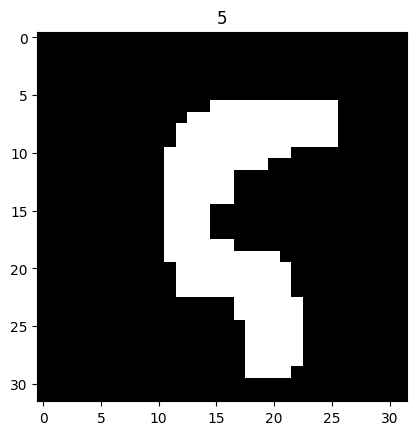

In [23]:
plt.imshow(x_train1[100])
plt.title(f'{np.argmax(y_train1[100])}')

In [24]:
x_train1=x_train1/255
x_test1=x_test1/255

x_train=x_train/255
x_test=x_test/255


In [25]:
len(x_test1)

10100

In [26]:

# input =keras.Input(shape=(28,28,1))
# x = Conv2D(filters=32,kernel_size = (3,3),activation='relu',strides=(1,1))(input)
# x = MaxPooling2D()(x)
# x = Conv2D(filters=64,kernel_size = (3,3),activation='relu',strides=(1,1))(x)
# x = MaxPooling2D()(x)
# x = Flatten()(x)
# x = Dense(64,activation='relu')(x)
# output = Dense(10,activation='softmax')(x)

# model =keras.Model(input,output)
# model.summary()


In [27]:
print('augment train data shape ',x_train1.shape)
print('augment test data shape ',x_test1.shape)
# x_train.shape
# x_test.shape

augment train data shape  (120000, 32, 32, 3)
augment test data shape  (10100, 32, 32, 3)


In [30]:
model.compile(optimizer=keras.optimizers.Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
early_stop=keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=15)

In [31]:
history=model.fit(x_train,y_train,epochs=10,validation_split=0.2,callbacks=[early_stop])

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.7038 - loss: 1.1364 - val_accuracy: 0.9084 - val_loss: 0.3641
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9119 - loss: 0.3343 - val_accuracy: 0.9328 - val_loss: 0.2410
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9334 - loss: 0.2387 - val_accuracy: 0.9431 - val_loss: 0.1953
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9439 - loss: 0.1920 - val_accuracy: 0.9483 - val_loss: 0.1721
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9524 - loss: 0.1632 - val_accuracy: 0.9511 - val_loss: 0.1590
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9551 - loss: 0.1505 - val_accuracy: 0.9539 - val_loss: 0.1478
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9599 - loss: 0.1364 - val_accuracy: 0.9583 - val_loss: 0.1337
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9628 - loss: 0

Text(0, 0.5, 'loss')

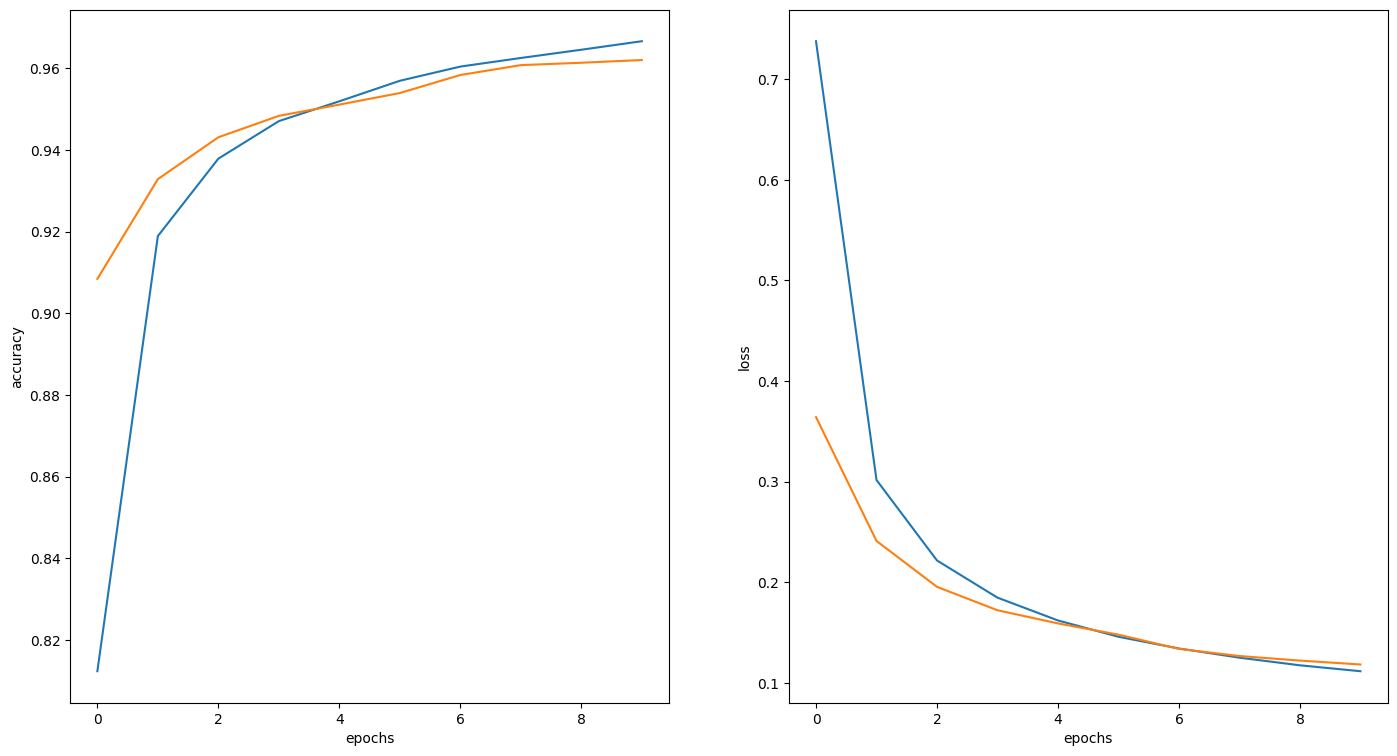

In [32]:
plt.figure(figsize=(17,9))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

In [33]:

# input =keras.Input(shape=(28,28,1))
# x = Conv2D(filters=32,kernel_size = (3,3),activation='relu',strides=(1,1))(input)
# x = MaxPooling2D()(x)
# x = Conv2D(filters=64,kernel_size = (3,3),activation='relu',strides=(1,1))(x)
# x = MaxPooling2D()(x)
# x = Flatten()(x)
# x = Dense(64,activation='relu')(x)
# output = Dense(10,activation='softmax')(x)

# augment_model =keras.Model(input,output)
# augment_model.summary()


augment_model = Sequential()
augment_model.add(tf.keras.Input(shape=(32, 32, 3)))
augment_model.add(conv_base)
augment_model.add(Flatten())
augment_model.add(Dense(512,activation='relu'))
augment_model.add(Dense(256,activation='relu'))
augment_model.add(Dense(10,activation='softmax'))



In [34]:
augment_model.compile(optimizer=keras.optimizers.Adam(0.00001), loss='categorical_crossentropy', metrics=['accuracy'])
history1=augment_model.fit(x_train1,y_train1,epochs=10,validation_split=0.2, callbacks=[early_stop])

Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 35s 11ms/step - accuracy: 0.4804 - loss: 1.7430 - val_accuracy: 0.7067 - val_loss: 1.0010
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 34s 9ms/step - accuracy: 0.7921 - loss: 0.7703 - val_accuracy: 0.7721 - val_loss: 0.7493
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.8410 - loss: 0.5602 - val_accuracy: 0.8132 - val_loss: 0.6203
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.8668 - loss: 0.4584 - val_accuracy: 0.8341 - val_loss: 0.5466
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - accuracy: 0.8858 - loss: 0.3964 - val_accuracy: 0.8492 - val_loss: 0.4929
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.8964 - loss: 0.3552 - val_accuracy: 0.8633 - val_loss: 0.4522
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.9060 - loss: 0.3201 - val_accuracy: 0.8713 - val_loss: 0.4234
Epoch 8/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.9128 - loss: 

Text(0, 0.5, 'loss')

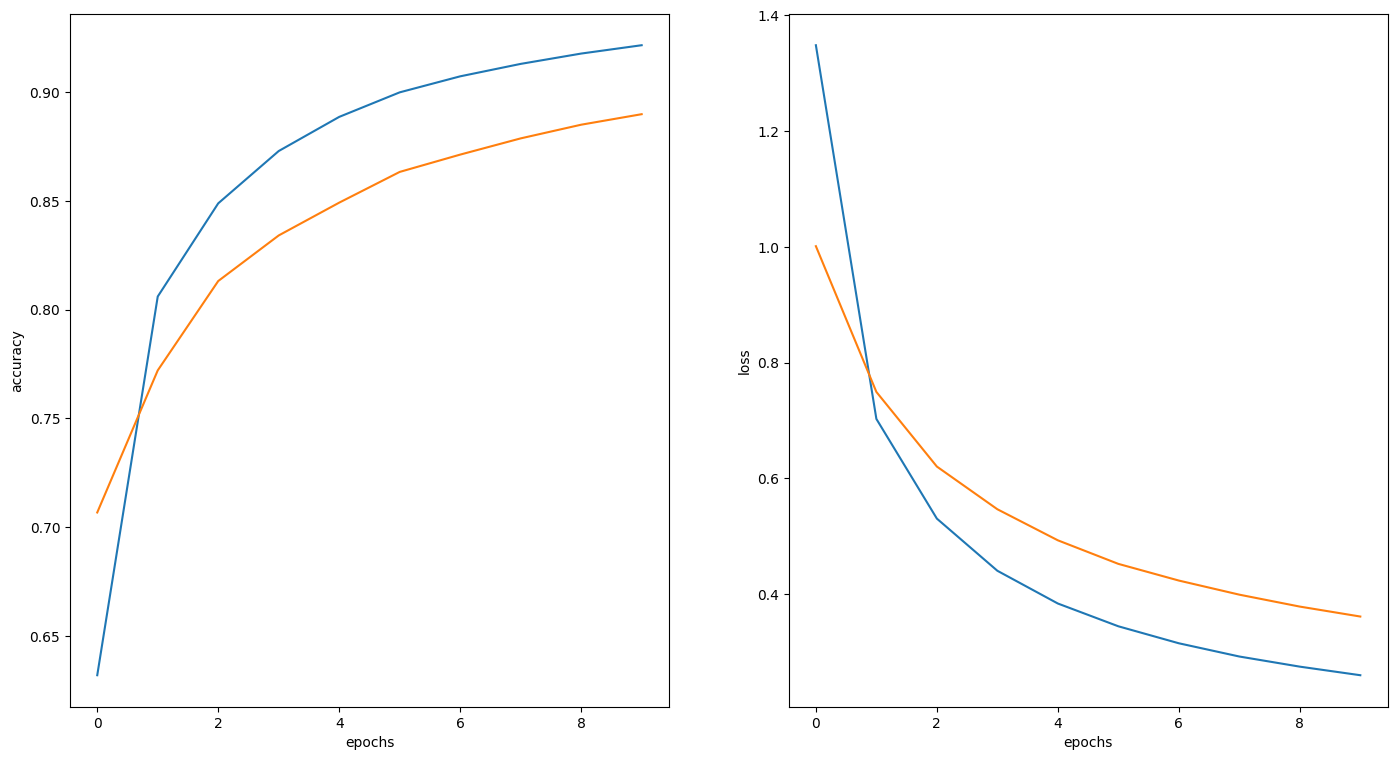

In [35]:
plt.figure(figsize=(17,9))
plt.subplot(1,2,1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.subplot(1,2,2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

In [37]:
loss,NMNT_accuracy=model.evaluate(x_test,y_test)
loss3,NMAT_accuracy=model.evaluate(x_test1,y_test1)

loss2,AMNT_accuracy=augment_model.evaluate(x_test,y_test)
loss2,AMAT_accuracy=augment_model.evaluate(x_test1,y_test1)

print(NMNT_accuracy)
print(NMAT_accuracy)

print(AMNT_accuracy)
print(AMAT_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9615 - loss: 0.1198
316/316 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9615 - loss: 0.1199
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9418 - loss: 0.1898
316/316 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9418 - loss: 0.1896
0.965499997138977
0.9624752402305603
0.9476000070571899
0.9472277164459229


In [38]:
import pandas as pd
from tabulate import tabulate

data = {
    'Original Data': [
        f'{NMNT_accuracy*100: .2f}%',
        f'{NMAT_accuracy*100: .2f}%'
    ],
    'Augmented Data': [
        f'{AMNT_accuracy*100: .2f}%',
        f'{AMAT_accuracy*100: .2f}%'
    ]
}

df = pd.DataFrame(data, index=['Model', 'Augmented Model'])
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))

╒═════════════════╤═════════════════╤══════════════════╕
│                 │ Original Data   │ Augmented Data   │
╞═════════════════╪═════════════════╪══════════════════╡
│ Model           │ 96.55%          │ 94.76%           │
├─────────────────┼─────────────────┼──────────────────┤
│ Augmented Model │ 96.25%          │ 94.72%           │
╘═════════════════╧═════════════════╧══════════════════╛
